### Unidad III. Agrupamiento y clasificación. 

## Técnicas topológicas de agrupación (clustering) jerárquicas y lineales. 

### Clustering

Una buena descripción y comparación de diferentes algoritmos de clustering se encuentra en el sitio de *Scikit Learn*: [**Clustering**](http://scikit-learn.org/stable/modules/clustering.html)

Existen diversas bibliotecas en diferentes leguaje (*R*, *Python*, *Julia*) que implementen diferentes algoritmos de clustering. En **Julia** tenemos, principalmente:
- [**Clustering**](https://github.com/JuliaStats/Clustering.jl) 
    - K-means
    - K-medoids
    - Affinity Propagation
    - DBSCAN
- [**Distances**](https://github.com/JuliaStats/Distances.jl) No tiene algoritmos de clustering, pero implementa diferentes <a href=”https://en.wikipedia.org/wiki/Metric_(mathematics)”>métricas</a> o medidas de distancia.
- [**ScikitLearn**](https://github.com/cstjean/ScikitLearn.jl)

In [1]:
using RDatasets 

iris = dataset("datasets", "iris")

head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [2]:
X = convert(Matrix{Float64}, iris[:,1:4])

150x4 Array{Float64,2}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮                 
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [3]:
using Distances

In [4]:
distancia = pairwise(Euclidean(), X)

4x4 Array{Float64,2}:
  0.0     36.1578  28.9662  57.183 
 36.1578   0.0     25.7781  25.8641
 28.9662  25.7781   0.0     33.8647
 57.183   25.8641  33.8647   0.0   

In [5]:
using RCall

In [6]:
R"""
hc <- hclust(as.dist($distancia), method="complete")
"""

RCall.RObject{RCall.VecSxp}

Call:
hclust(d = as.dist(`#JL`$distancia), method = "complete")

Cluster method   : complete 
Number of objects: 4 



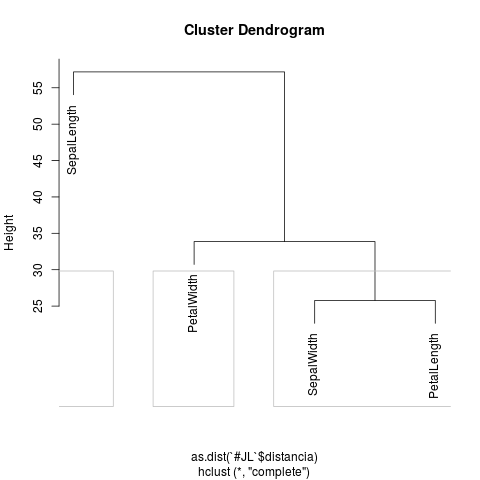

In [7]:
R"""
plot(hc, label=$(names(iris)[1:4]))
rect.hclust(hc, h=30, border="gray")
""";

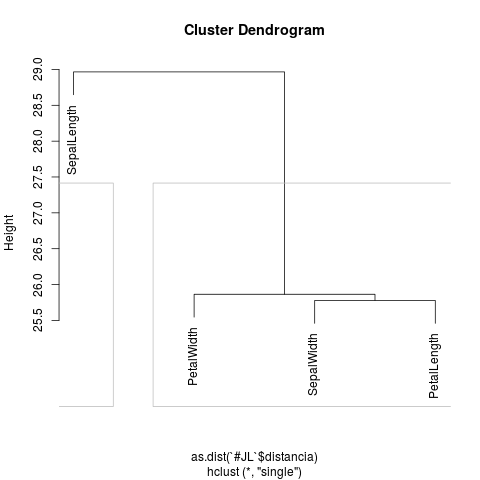

In [8]:
R"""
hc <- hclust(as.dist($distancia), method="single")
plot(hc, label=$(names(iris)[1:4]))
rect.hclust(hc, h=30, border="gray")
""";

In [9]:
distancia = pairwise(Euclidean(), X')

150x150 Array{Float64,2}:
 0.0       0.538516  0.509902  0.648074  …  4.45982   4.65081   4.14005 
 0.538516  0.0       0.3       0.331662     4.49889   4.71805   4.15331 
 0.509902  0.3       0.0       0.244949     4.66154   4.84871   4.29884 
 0.648074  0.331662  0.244949  0.0          4.53321   4.71911   4.1497  
 0.141421  0.608276  0.509902  0.648074     4.50444   4.67868   4.17373 
 0.616441  1.09087   1.08628   1.16619   …  4.10244   4.26497   3.81838 
 0.519615  0.509902  0.264575  0.331662     4.59347   4.74974   4.21782 
 0.173205  0.424264  0.412311  0.5          4.39773   4.58912   4.06079 
 0.921954  0.509902  0.43589   0.3          4.70106   4.88876   4.30232 
 0.469042  0.173205  0.316228  0.316228     4.45758   4.67226   4.10609 
 0.374166  0.866025  0.883176  1.0       …  4.31625   4.5111    4.03237 
 0.374166  0.458258  0.374166  0.374166     4.38748   4.5618    4.02244 
 0.591608  0.141421  0.264575  0.264575     4.57602   4.79166   4.21782 
 ⋮                       

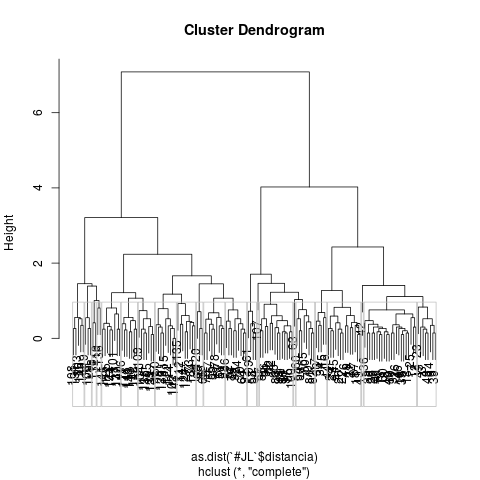

In [10]:
R"""
hcomplete <- hclust(as.dist($distancia), method="complete")
plot(hcomplete)
rect.hclust(hcomplete, h=1.0, border="gray")
""";

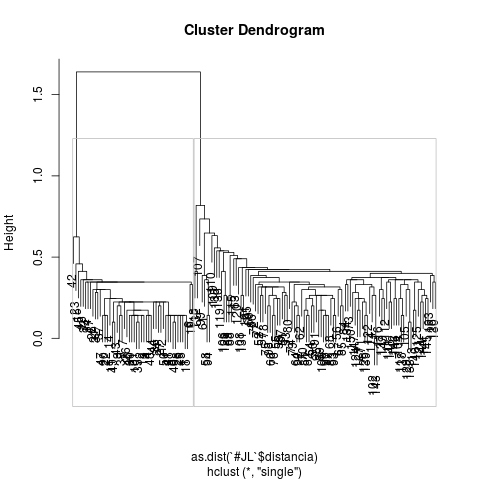

In [11]:
R"""
hsingle <- hclust(as.dist($distancia), method="single")
plot(hsingle)
rect.hclust(hsingle, h=1.0, border="gray")
""";

In [12]:
hsingle = rcopy( R"cutree(hsingle, h=1.0)" )

150-element Array{Int32,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [13]:
hcomplete = rcopy( R"cutree(hcomplete, h=1.0)" )

150-element Array{Int32,1}:
  1
  1
  2
  2
  1
  3
  1
  1
  2
  1
  3
  1
  1
  ⋮
 13
 21
 15
 21
 13
 15
 15
 21
 14
 21
 15
 13

In [15]:
using FreqTables

In [16]:
freqtable(hcomplete, hsingle)

22x2 NamedArray{Int64,2}:
Dim1 ╲ Dim2 │  1   2
────────────┼───────
1           │ 22   0
2           │  8   0
3           │ 14   0
4           │  5   0
5           │  1   0
6           │  0   9
7           │  0   9
8           │  0   8
9           │  0  14
10          │  0   4
11          │  0   1
12          │  0   3
13          │  0   9
14          │  0   8
15          │  0   8
16          │  0   5
17          │  0   7
18          │  0   3
19          │  0   1
20          │  0   2
21          │  0   7
22          │  0   2

In [17]:
using Clustering

In [18]:
varinfo(maximum(hcomplete), hcomplete, maximum(hsingle), hsingle)

LoadError: LoadError: MethodError: `varinfo` has no method matching varinfo(::Int32, ::Array{Int32,1}, ::Int32, ::Array{Int32,1})
while loading In[18], in expression starting on line 1

In [19]:
methods(varinfo)

# 3 methods for generic function "varinfo":
varinfo(k1::Int64, a1::AbstractArray{Int64,1}, k2::Int64, a2::AbstractArray{Int64,1}) at /home/dzea/.julia/v0.4/Clustering/src/varinfo.jl:7
varinfo(R::Clustering.ClusteringResult, k0::Int64, a0::AbstractArray{Int64,1}) at /home/dzea/.julia/v0.4/Clustering/src/varinfo.jl:51
varinfo(R1::Clustering.ClusteringResult, R2::Clustering.ClusteringResult) at /home/dzea/.julia/v0.4/Clustering/src/varinfo.jl:54

In [20]:
hcomplete = convert(Vector{Int64}, hcomplete)
hsingle   = convert(Vector{Int64}, hsingle)

150-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

In [21]:
varinfo(maximum(hcomplete), hcomplete, maximum(hsingle), hsingle)

2.2007191709028677

In [22]:
using Bootstrap

In [23]:
( varinfo(maximum(hcomplete), hcomplete, maximum(hcomplete), hcomplete), 
  varinfo(maximum(hsingle), hsingle, maximum(hsingle), hsingle) )

(8.881784197001252e-16,0.0)

In [24]:
asignaciones = hcat(hcomplete, hsingle)

150x2 Array{Int64,2}:
  1  1
  1  1
  2  1
  2  1
  1  1
  3  1
  1  1
  1  1
  2  1
  1  1
  3  1
  1  1
  1  1
  ⋮   
 13  2
 21  2
 15  2
 21  2
 13  2
 15  2
 15  2
 21  2
 14  2
 21  2
 15  2
 13  2

In [25]:
function VI(indices)
    A = asignaciones[indices,1]
    B = asignaciones[indices,2]
    varinfo(maximum(A), A, maximum(B), B)
end

VI (generic function with 1 method)

In [26]:
VI_boot = boot_basic(1:size(asignaciones,1), VI, 10_000)

Bootstrap Sampling
  Estimate: 2.2007
  Bias:     -0.071318
  StdError: 0.071914
  Samples:  10000
  Method:   basic
  Data:     UnitRange{Int64}: { 150 }


In [27]:
ci_bca(VI_boot)

Bootstrap Confidence Interval
  Estimate: 2.2007
  Interval: [2.133259307361124,2.393042258978316]
  Level:    0.95
  Method:   bca


[Plots.jl] Initializing backend: pyplot



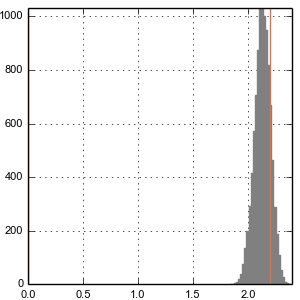

In [28]:
using Plots
pyplot(size=(300,300))

histogram(VI_boot.t1, linecolor=:gray, fillcolor=:gray, legend=false)
vline!([0, VI_boot.t0])